## Import Dependencies

In [1]:
import pandas as pd
import os 
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sys.path.append(os.path.abspath(os.path.join('..')))

## Load Modules

In [2]:
from src.data_loader import DataLoader
from src.model_trainer import ModelTrainer

## Credit Card Fraud Detection

In [3]:
# Load Data
loader = DataLoader('../data/processed')
df_cc = loader.load_csv('creditcard_processed.csv')

Loading creditcard_processed.csv...


In [4]:
# Initialize trainer
trainer_cc = ModelTrainer(df_cc, target_col='Class')
trainer_cc.split_data()

Splitting data (Test size: 0.2)....
Train Shape: (226980, 30), Test Shape: (56746, 30)


### Model A: Logistic Regression(Baseline)


--- Training Logistic Regression with Stratified K-Fold (k=5) ---
Mean F1-Score (CV): 0.1051 (+/- 0.0109)

--- Test Set Results: Logistic Regression ---
Accuracy:  0.9737
Precision: 0.0530
Recall:    0.8737
F1 Score:  0.1000
ROC AUC:   0.9620
PR AUC:    0.6769 (Key Metric for Imbalance)


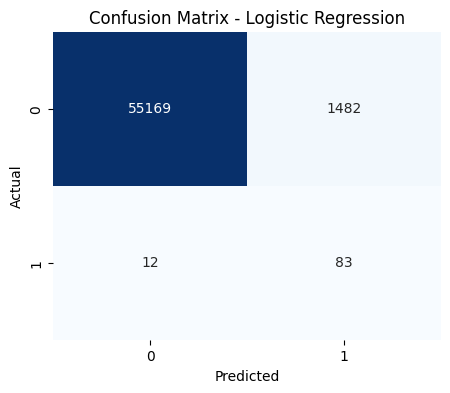

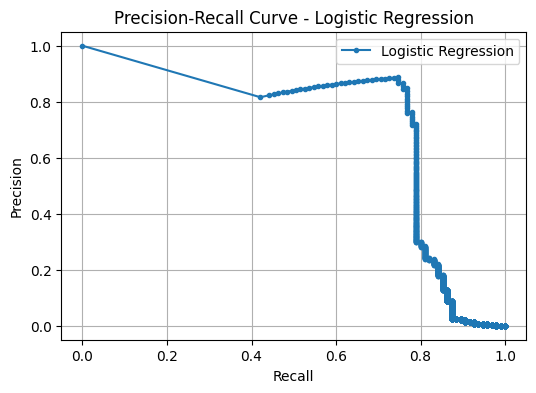

In [5]:
lr_model = LogisticRegression(solver='liblinear', random_state=42)
trainer_cc.train_with_cv(lr_model, 'Logistic Regression')
trainer_cc.evaluate_model("Logistic Regression")

### Model B: Random Forest (Ensemble)


--- Training Random Forest with Stratified K-Fold (k=5) ---
Mean F1-Score (CV): 0.7004 (+/- 0.0435)

--- Test Set Results: Random Forest ---
Accuracy:  0.9985
Precision: 0.5396
Recall:    0.7895
F1 Score:  0.6410
ROC AUC:   0.9796
PR AUC:    0.7688 (Key Metric for Imbalance)


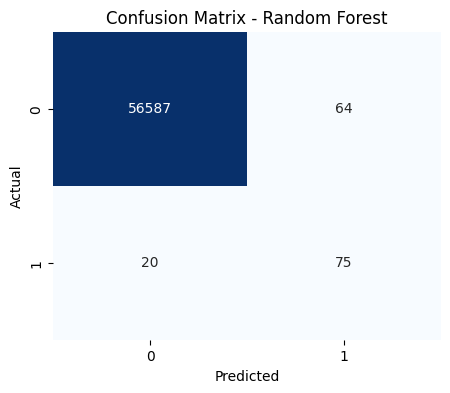

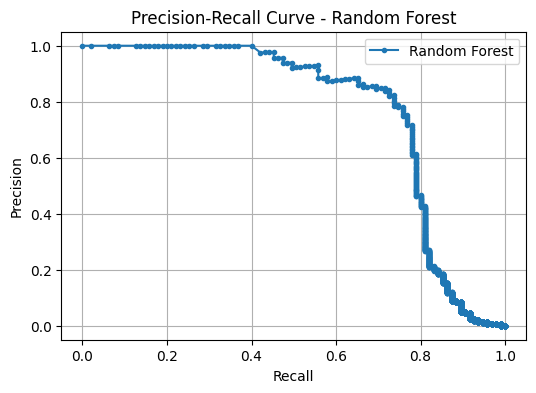

In [6]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
trainer_cc.train_with_cv(rf_model, "Random Forest")
trainer_cc.evaluate_model("Random Forest")

### Model C: XGBoost (Gradient Boosting)


--- Training XGBoost with Stratified K-Fold (k=5) ---


/home/bini/Documents/repos/Fraud-detection/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [21:56:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bini/Documents/repos/Fraud-detection/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [21:56:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bini/Documents/repos/Fraud-detection/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [21:56:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bini/Documents/repos/Fraud-detection/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [21:56:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not

Mean F1-Score (CV): 0.7885 (+/- 0.0305)


/home/bini/Documents/repos/Fraud-detection/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [21:57:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Test Set Results: XGBoost ---
Accuracy:  0.9992
Precision: 0.7500
Recall:    0.7895
F1 Score:  0.7692
ROC AUC:   0.9713
PR AUC:    0.8083 (Key Metric for Imbalance)


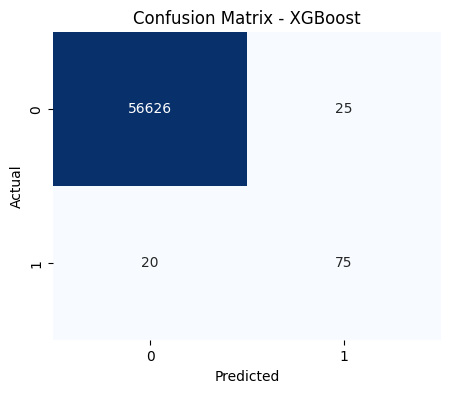

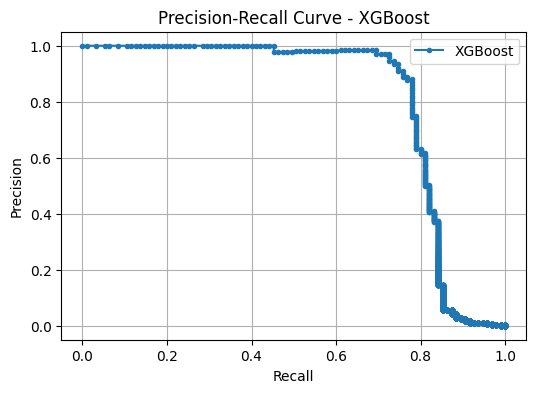

In [8]:
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
trainer_cc.train_with_cv(xgb_model, "XGBoost")
trainer_cc.evaluate_model("XGBoost")

### Comparison

In [9]:
print("\n>>> Credit Card Model Comparison <<<")
print(trainer_cc.get_comparison_table())


>>> Credit Card Model Comparison <<<
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
3              XGBoost  0.999207   0.750000  0.789474  0.769231  0.971271   
2              XGBoost  0.999207   0.750000  0.789474  0.769231  0.971271   
1        Random Forest  0.998520   0.539568  0.789474  0.641026  0.979626   
0  Logistic Regression  0.973672   0.053035  0.873684  0.100000  0.962025   

     PR AUC  
3  0.808342  
2  0.808342  
1  0.768804  
0  0.676873  


## E-Commerce Fraud Detection

In [10]:
# Load Data
df_ecom = loader.load_csv('fraud_data_processed.csv')

Loading fraud_data_processed.csv...


In [11]:
# Initialize Trainer
trainer_ecom = ModelTrainer(df_ecom, target_col='class')
trainer_ecom.split_data()

Splitting data (Test size: 0.2)....
Train Shape: (120889, 194), Test Shape: (30223, 194)


### Model A: Logistic Regression


--- Training Logistic Regression with Stratified K-Fold (k=5) ---
Mean F1-Score (CV): 0.3121 (+/- 0.0033)

--- Test Set Results: Logistic Regression ---
Accuracy:  0.7212
Precision: 0.1987
Recall:    0.6519
F1 Score:  0.3046
ROC AUC:   0.7363
PR AUC:    0.3605 (Key Metric for Imbalance)


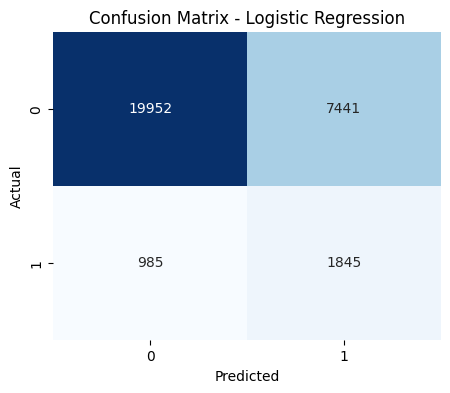

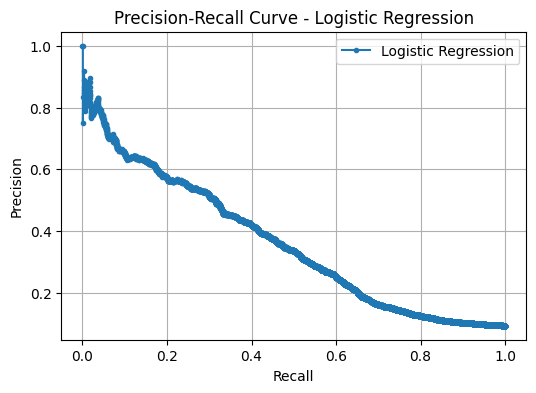

In [12]:
lr_ecom = LogisticRegression(solver='liblinear', random_state=42)
trainer_ecom.train_with_cv(lr_ecom, "Logistic Regression")
trainer_ecom.evaluate_model("Logistic Regression")

### Model B: Random Forest


--- Training Random Forest with Stratified K-Fold (k=5) ---
Mean F1-Score (CV): 0.6824 (+/- 0.0217)

--- Test Set Results: Random Forest ---
Accuracy:  0.9555
Precision: 0.9960
Recall:    0.5272
F1 Score:  0.6895
ROC AUC:   0.7696
PR AUC:    0.6218 (Key Metric for Imbalance)


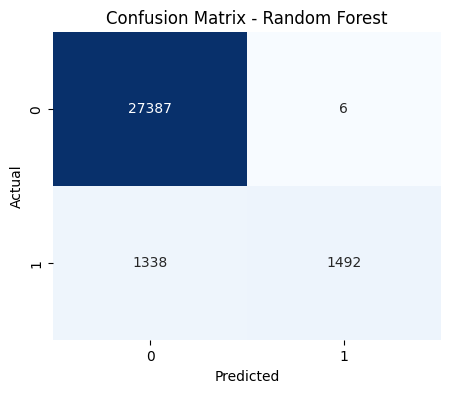

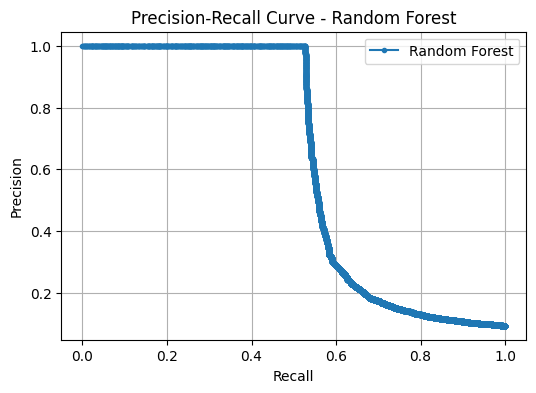

In [13]:
rf_ecom = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42, n_jobs=-1)
trainer_ecom.train_with_cv(rf_ecom, "Random Forest")
trainer_ecom.evaluate_model("Random Forest")

### Model C: XGBoost


--- Training XGBoost with Stratified K-Fold (k=5) ---


/home/bini/Documents/repos/Fraud-detection/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [22:01:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bini/Documents/repos/Fraud-detection/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [22:01:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bini/Documents/repos/Fraud-detection/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [22:01:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bini/Documents/repos/Fraud-detection/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [22:01:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not

Mean F1-Score (CV): 0.6891 (+/- 0.0043)


/home/bini/Documents/repos/Fraud-detection/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [22:02:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Test Set Results: XGBoost ---
Accuracy:  0.9523
Precision: 0.9316
Recall:    0.5293
F1 Score:  0.6751
ROC AUC:   0.7646
PR AUC:    0.5996 (Key Metric for Imbalance)


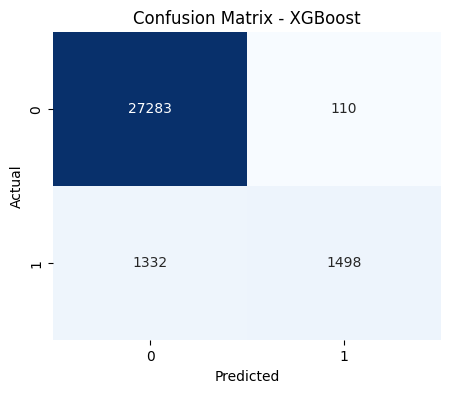

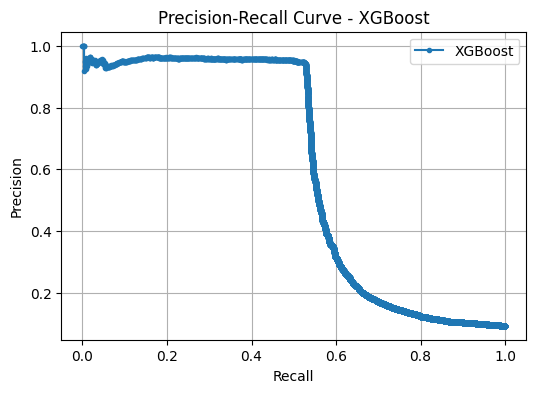

In [14]:
xgb_ecom = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
trainer_ecom.train_with_cv(xgb_ecom, "XGBoost")
trainer_ecom.evaluate_model("XGBoost")

### Comparison

In [15]:
print("\n>>> E-Commerce Model Comparison <<<")
print(trainer_ecom.get_comparison_table())


>>> E-Commerce Model Comparison <<<
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
1        Random Forest  0.955531   0.995995  0.527208  0.689464  0.769560   
2              XGBoost  0.952288   0.931592  0.529329  0.675079  0.764571   
0  Logistic Regression  0.721206   0.198686  0.651943  0.304556  0.736260   

     PR AUC  
1  0.621836  
2  0.599603  
0  0.360519  
